#Employee salary prediction : Linear Regression

Import Package Library :

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Read Data File/CSV file

In [5]:
sal_data = pd.read_csv('Dataset09-Employee-salary-prediction.csv')
sal_data.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


Numbers of Row and Column

In [7]:
sal_data.shape

(375, 6)

List of columns

In [9]:
sal_data.columns

Index(['Age', 'Gender', 'Education Level', 'Job Title', 'Years of Experience',
       'Salary'],
      dtype='object')

Rename Columns

In [11]:
sal_data.columns = ['Age' , 'Gender' , 'Degree' ,'Job_Title' ,'Experience_Years' , 'Salary']

In [12]:
sal_data.head()

,Age,Gender,Degree,Job_Title,Experience_Years,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


Columns Datatypes :

In [14]:
sal_data.dtypes

Age                 float64
Gender               object
Degree               object
Job_Title            object
Experience_Years    float64
Salary              float64
dtype: object

Information of Datasets :

In [16]:
sal_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               373 non-null    float64
 1   Gender            373 non-null    object 
 2   Degree            373 non-null    object 
 3   Job_Title         373 non-null    object 
 4   Experience_Years  373 non-null    float64
 5   Salary            373 non-null    float64
dtypes: float64(3), object(3)
memory usage: 17.7+ KB


Duplicates Records in data :

In [18]:
sal_data[sal_data.duplicated()]

,Age,Gender,Degree,Job_Title,Experience_Years,Salary
195,28.0,Male,Bachelor's,Junior Business Analyst,2.0,40000.0
250,30.0,Female,Bachelor's,Junior Marketing Coordinator,2.0,40000.0
251,38.0,Male,Master's,Senior IT Consultant,9.0,110000.0
252,45.0,Female,PhD,Senior Product Designer,15.0,150000.0
253,28.0,Male,Bachelor's,Junior Business Development Associate,2.0,40000.0
254,35.0,Female,Bachelor's,Senior Marketing Analyst,8.0,85000.0
255,44.0,Male,Bachelor's,Senior Software Engineer,14.0,130000.0
256,34.0,Female,Master's,Senior Financial Advisor,6.0,100000.0
257,35.0,Male,Bachelor's,Senior Project Coordinator,9.0,95000.0
258,50.0,Female,PhD,Director of Operations,22.0,180000.0


In [19]:
sal_data[sal_data.duplicated()].shape

(50, 6)

Dropping Duplicates From the Data :

In [21]:
sal_data1 = sal_data.drop_duplicates(keep = 'first')
sal_data1.shape

(325, 6)

Missing / Null value In each columns :

In [23]:
sal_data1.isnull().sum()

Age                 1
Gender              1
Degree              1
Job_Title           1
Experience_Years    1
Salary              1
dtype: int64

Dropping missing Value From the datasets :

In [25]:
sal_data1.dropna(how= 'any' , inplace = True )

C:\Users\adity\AppData\Local\Temp\ipykernel_2144\3851320603.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sal_data1.dropna(how= 'any' , inplace = True )


In [26]:
sal_data1.shape

(324, 6)

Size of the Data after dropping duplicate and null values :

In [28]:
sal_data1.head()

,Age,Gender,Degree,Job_Title,Experience_Years,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [29]:
# Data Exploration and Visualization

Statics of numericals columns: 

In [31]:
sal_data1.describe()

,Age,Experience_Years,Salary
count,324.000000,324.000000,324.000000
mean,37.382716,10.058642,99985.648148
std,7.185844,6.650470,48652.271440
min,23.000000,0.000000,350.000000
25%,31.000000,4.000000,55000.000000
50%,36.500000,9.000000,95000.000000
75%,44.000000,16.000000,140000.000000
max,53.000000,25.000000,250000.000000


Correlation Matrix among Numerical Features:

In [33]:
corr = sal_data1[['Age', 'Experience_Years' , 'Salary']].corr()
corr

,Age,Experience_Years,Salary
Age,1.000000,0.979192,0.916543
Experience_Years,0.979192,1.000000,0.924455
Salary,0.916543,0.924455,1.000000


<Axes: >

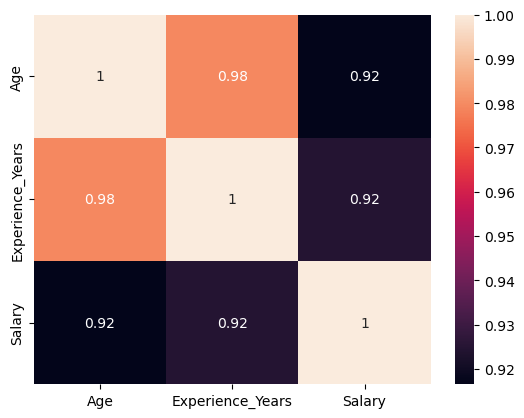

In [34]:
sns.heatmap( corr,annot=True)

Data Visualization -Bar chart ,Box plot,Histogram

In [36]:
sal_data1['Degree'].value_counts()

Degree
Bachelor's    191
Master's       91
PhD            42
Name: count, dtype: int64

<Axes: xlabel='Degree'>

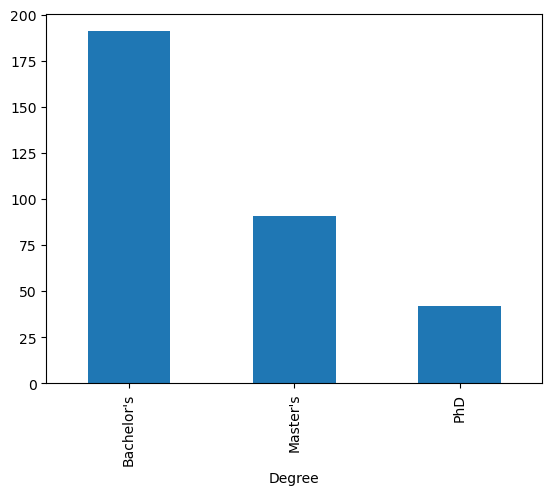

In [37]:
sal_data1['Degree'].value_counts().plot(kind = 'bar')

In [38]:
sal_data1['Job_Title'].value_counts()

Job_Title
Director of Operations             9
Director of Marketing              8
Senior Marketing Manager           8
Senior Project Manager             7
Senior Business Analyst            6
                                  ..
Business Development Manager       1
Customer Service Representative    1
IT Manager                         1
Digital Marketing Manager          1
Junior Web Developer               1
Name: count, Length: 174, dtype: int64

In [39]:
sal_data1['Job_Title'].unique()

array(['Software Engineer', 'Data Analyst', 'Senior Manager',
       'Sales Associate', 'Director', 'Marketing Analyst',
       'Product Manager', 'Sales Manager', 'Marketing Coordinator',
       'Senior Scientist', 'Software Developer', 'HR Manager',
       'Financial Analyst', 'Project Manager', 'Customer Service Rep',
       'Operations Manager', 'Marketing Manager', 'Senior Engineer',
       'Data Entry Clerk', 'Sales Director', 'Business Analyst',
       'VP of Operations', 'IT Support', 'Recruiter', 'Financial Manager',
       'Social Media Specialist', 'Software Manager', 'Junior Developer',
       'Senior Consultant', 'Product Designer', 'CEO', 'Accountant',
       'Data Scientist', 'Marketing Specialist', 'Technical Writer',
       'HR Generalist', 'Project Engineer', 'Customer Success Rep',
       'Sales Executive', 'UX Designer', 'Operations Director',
       'Network Engineer', 'Administrative Assistant',
       'Strategy Consultant', 'Copywriter', 'Account Manager',
      

<Axes: ylabel='Gender'>

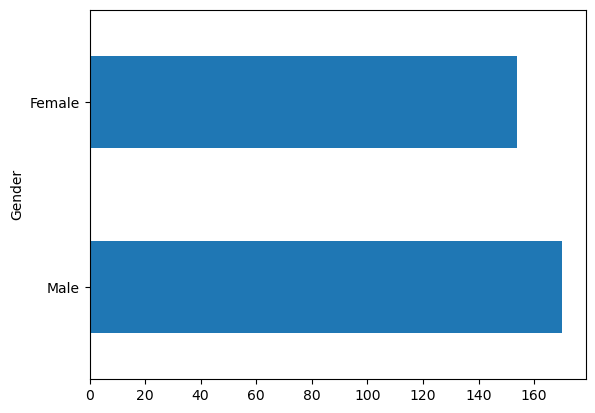

In [40]:
sal_data1['Gender'].value_counts().plot(kind = 'barh')

Numerical Variable - Plot histogram / Box plot :

<Axes: ylabel='Frequency'>

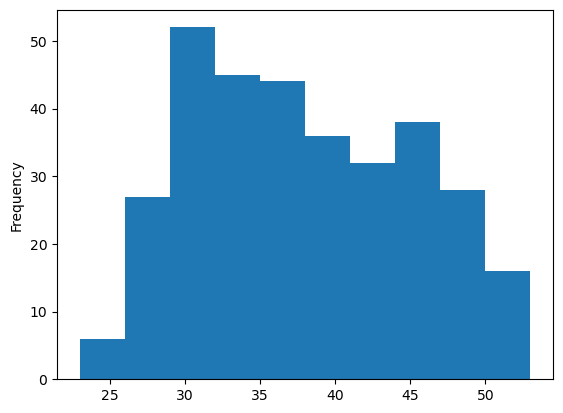

In [42]:
sal_data1['Age'].plot(kind='hist')

<Axes: >

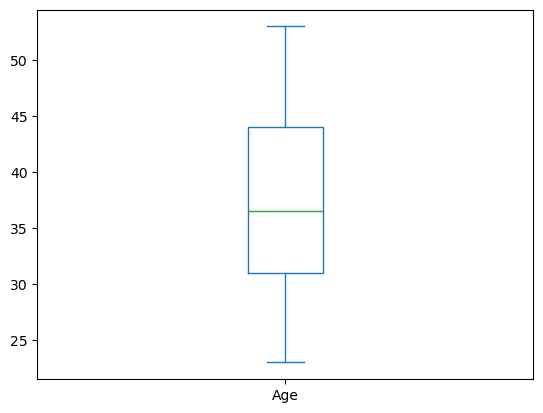

In [43]:
sal_data1.Age.plot(kind = 'box')

<Axes: >

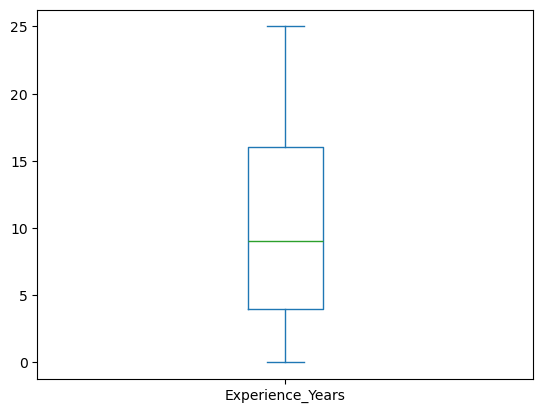

In [44]:
sal_data1.Experience_Years.plot(kind = 'box')

<Axes: >

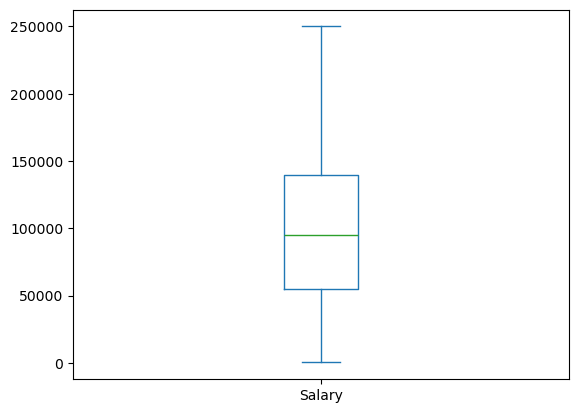

In [45]:
sal_data1.Salary.plot(kind = 'box')

<Axes: ylabel='Frequency'>

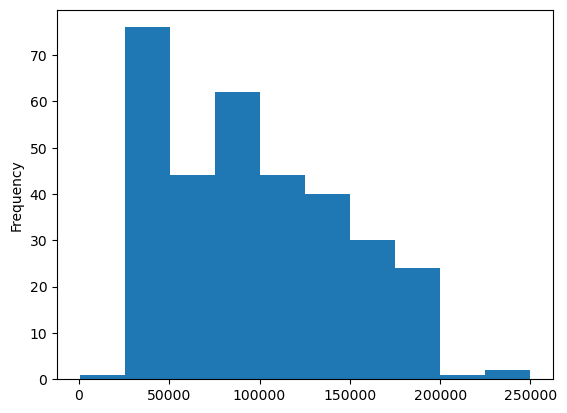

In [46]:
sal_data1.Salary.plot(kind = 'hist')

In [47]:
sal_data1.head()

,Age,Gender,Degree,Job_Title,Experience_Years,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


Feature Engineering :

Lable Encoading :

In [50]:
from sklearn.preprocessing import LabelEncoder
Label_Encoder = LabelEncoder()

In [51]:
sal_data1['Gender_Encode'] = Label_Encoder.fit_transform(sal_data1['Gender'])

C:\Users\adity\AppData\Local\Temp\ipykernel_2144\1017469824.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sal_data1['Gender_Encode'] = Label_Encoder.fit_transform(sal_data1['Gender'])


In [52]:
sal_data1['Degree_Encode'] = Label_Encoder.fit_transform(sal_data1['Degree'])

C:\Users\adity\AppData\Local\Temp\ipykernel_2144\446779904.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sal_data1['Degree_Encode'] = Label_Encoder.fit_transform(sal_data1['Degree'])


In [53]:
sal_data1['Job_Title_Encode'] = Label_Encoder.fit_transform(sal_data1['Job_Title'])

C:\Users\adity\AppData\Local\Temp\ipykernel_2144\840262182.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sal_data1['Job_Title_Encode'] = Label_Encoder.fit_transform(sal_data1['Job_Title'])


Data After Lable Encoding

In [55]:
sal_data1.head()

,Age,Gender,Degree,Job_Title,Experience_Years,Salary,Gender_Encode,Degree_Encode,Job_Title_Encode
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0,1,0,159
1,28.0,Female,Master's,Data Analyst,3.0,65000.0,0,1,17
2,45.0,Male,PhD,Senior Manager,15.0,150000.0,1,2,130
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0,0,0,101
4,52.0,Male,Master's,Director,20.0,200000.0,1,1,22


In [56]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler

Feature Scaling

In [58]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()

In [59]:
sal_data1['Age_scaled'] = std_scaler.fit_transform(sal_data1[['Age']])
sal_data1['Experience_Years_scaled'] = std_scaler.fit_transform(sal_data1[['Experience_Years']])

C:\Users\adity\AppData\Local\Temp\ipykernel_2144\1618658710.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sal_data1['Age_scaled'] = std_scaler.fit_transform(sal_data1[['Age']])
C:\Users\adity\AppData\Local\Temp\ipykernel_2144\1618658710.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sal_data1['Experience_Years_scaled'] = std_scaler.fit_transform(sal_data1[['Experience_Years']])


Data After Scaling

In [61]:
sal_data1.head()

,Age,Gender,Degree,Job_Title,Experience_Years,Salary,Gender_Encode,Degree_Encode,Job_Title_Encode,Age_scaled,Experience_Years_scaled
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0,1,0,159,-0.750231,-0.761821
1,28.0,Female,Master's,Data Analyst,3.0,65000.0,0,1,17,-1.307742,-1.063017
2,45.0,Male,PhD,Senior Manager,15.0,150000.0,1,2,130,1.061680,0.744158
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0,0,0,101,-0.192720,-0.460625
4,52.0,Male,Master's,Director,20.0,200000.0,1,1,22,2.037324,1.497148


Dependent & independent features:

In [63]:
# Check if all columns are present
required_columns = ['Age_scaled', 'Gender_Encode', 'Degree_Encode', 'Job_Title_Encode', 'Experience_Years_scaled', 'Salary']
missing_columns = [col for col in required_columns if col not in sal_data1.columns]
if missing_columns:
    print("Missing columns:", missing_columns)
else:
    x = sal_data1[['Age_scaled','Gender_Encode','Degree_Encode','Job_Title_Encode','Experience_Years_scaled']]
    y = sal_data1['Salary']


In [64]:
x.head()

,Age_scaled,Gender_Encode,Degree_Encode,Job_Title_Encode,Experience_Years_scaled
0,-0.750231,1,0,159,-0.761821
1,-1.307742,0,1,17,-1.063017
2,1.061680,1,2,130,0.744158
3,-0.192720,0,0,101,-0.460625
4,2.037324,1,1,22,1.497148


Splitting the data into training and testing

In [66]:
from sklearn.model_selection import train_test_split

In [67]:
x_train,x_test,y_train,y_test, = train_test_split(x,y,test_size=0.2, random_state=42)

In [68]:
x_train.shape , y_train.shape

((259, 5), (259,))

In [69]:
x_test.shape , y_test.shape

((65, 5), (65,))

Model Development :

In [71]:
from sklearn.linear_model import LinearRegression

In [72]:
Linear_regression_model = LinearRegression()

Model Training :

In [74]:
Linear_regression_model.fit(x_train,y_train)

LinearRegression()

Model Prediction :

In [76]:
y_pred_lr=Linear_regression_model.predict(x_test)
y_pred_lr

array([117415.91344602, 125562.80742758,  48965.15386167, 128739.34887988,
       106828.49930535,  99654.76748821,  49101.27883652,  57130.71108104,
       166333.69009266,  43112.61060113,  40544.18249367, 122553.217185  ,
       107631.15450848, 155580.48335296,  83652.23602446, 170890.28450907,
        98984.50106226, 109338.33008328,  42267.86835535,  48089.87647812,
        75674.93528581,  64499.29874156,  63619.2494321 ,  31543.41552147,
       188376.92844437,  90340.76921722, 155285.91529198, 160863.57809872,
       185183.73163709,  34741.26224478, 124850.6230462 , 165106.94121635,
        87085.00622186, 155425.69514031, 149190.25441885,  45729.74800187,
        88475.39474629,  92025.62668073,  97997.32557607,  40411.112659  ,
        89995.79796521,  53873.21977084, 108677.48549927,  54590.96778663,
        36497.92729223,  48611.85493217, 129193.72126941,  43102.58902589,
       162383.16672117,  81874.95829259, 157771.0301154 ,  43984.89040816,
        59950.21740617,  

In [77]:
df = pd.DataFrame({'y_Actual' : y_test, 'y_predicted' :y_pred_lr})
df['Error']=df['y_Actual']-df['y_predicted']
df['abs_Error']=abs(df['Error'])
df

,y_Actual,y_predicted,Error,abs_Error
132,100000.0,117415.913446,-17415.913446,17415.913446
108,100000.0,125562.807428,-25562.807428,25562.807428
137,50000.0,48965.153862,1034.846138,1034.846138
9,110000.0,128739.348880,-18739.348880,18739.348880
181,105000.0,106828.499305,-1828.499305,1828.499305
...,...,...,...,...
104,80000.0,117279.788471,-37279.788471,37279.788471
233,85000.0,83396.821876,1603.178124,1603.178124
60,170000.0,177743.761029,-7743.761029,7743.761029
94,75000.0,72275.144274,2724.855726,2724.855726


In [78]:
Mean_absolute_Error = df['abs_Error'].mean()
Mean_absolute_Error

10570.786401136183

Model Evaluation :

In [80]:
from sklearn.metrics import accuracy_score, r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error

Model Accuracy :

In [82]:
r2_score(y_test,y_pred_lr)


0.8911231066517088

In [83]:
print(f' Accuracy of the model = {round (r2_score(y_test,y_pred_lr),4)*100}%')

 Accuracy of the model = 89.11%


Mean Absolute Error :

In [85]:
round(mean_absolute_error(y_test,y_pred_lr),2)

10570.79

In [86]:
print(f"Mean Absolute Error = {round(mean_absolute_error(y_test,y_pred_lr),2)}")


Mean Absolute Error = 10570.79


Mean Squared Error :

In [88]:
mse = round(mean_squared_error(y_test,y_pred_lr),2)
mse

205754135.72

In [89]:
print(f"Mean Squared Error = {round(mean_squared_error(y_test,y_pred_lr),2)}")

Mean Squared Error = 205754135.72


Root Mean Squared Error :

In [91]:
print('Root Mean Squared Error (RMSE) = ',mse**(0.5))

Root Mean Squared Error (RMSE) =  14344.132449193294


Coefficients :

In [94]:
Linear_regeression_model.coef_

NameError: name 'Linear_regeression_model' is not defined

Intercepts :

In [97]:
Linear_regeression_model.intercept_

NameError: name 'Linear_regeression_model' is not defined

Costomise Predictions :

In [100]:
sal_data1.head()

,Age,Gender,Degree,Job_Title,Experience_Years,Salary,Gender_Encode,Degree_Encode,Job_Title_Encode,Age_scaled,Experience_Years_scaled
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0,1,0,159,-0.750231,-0.761821
1,28.0,Female,Master's,Data Analyst,3.0,65000.0,0,1,17,-1.307742,-1.063017
2,45.0,Male,PhD,Senior Manager,15.0,150000.0,1,2,130,1.061680,0.744158
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0,0,0,101,-0.192720,-0.460625
4,52.0,Male,Master's,Director,20.0,200000.0,1,1,22,2.037324,1.497148


In [102]:
Age1 = std_scaler.transform([[49]])
Age = 5.86448677
Gender = 0
Degree = 2
Job_Title = 22
Experience_years1 = std_scaler.transform([[15]])
Experience_years = 0.74415815
#find the salary = ?

C:\Users\adity\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\adity\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [104]:
std_scaler.transform([[15]])[0][0]

C:\Users\adity\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


0.7441581452572275

In [106]:
Emp_salary = Linear_regression_model.predict([[Age,Gender,Degree,Job_Title,Experience_years]])
Emp_salary

C:\Users\adity\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([249925.15061728])

In [108]:
print ("Salary of the Employee with above Attributes = ",Emp_salary[0])

Salary of the Employee with above Attributes =  249925.1506172759
